# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
#%load_ext nb_black
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [2]:
df = pd.read_csv('used_device_data.csv')

## Data Overview

- Observations
- Sanity checks

In [3]:
# Display firt five rows of data.
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [4]:
# Check the shape.
df.shape

(3454, 15)

In [5]:
# Check data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [6]:
# Statistical summery.
df.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


In [7]:
# Check for duplicates.
df.duplicated().sum()

0

In [8]:
# Check for missing values
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [9]:
# Create a copy fo the data.
df_copy = df.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

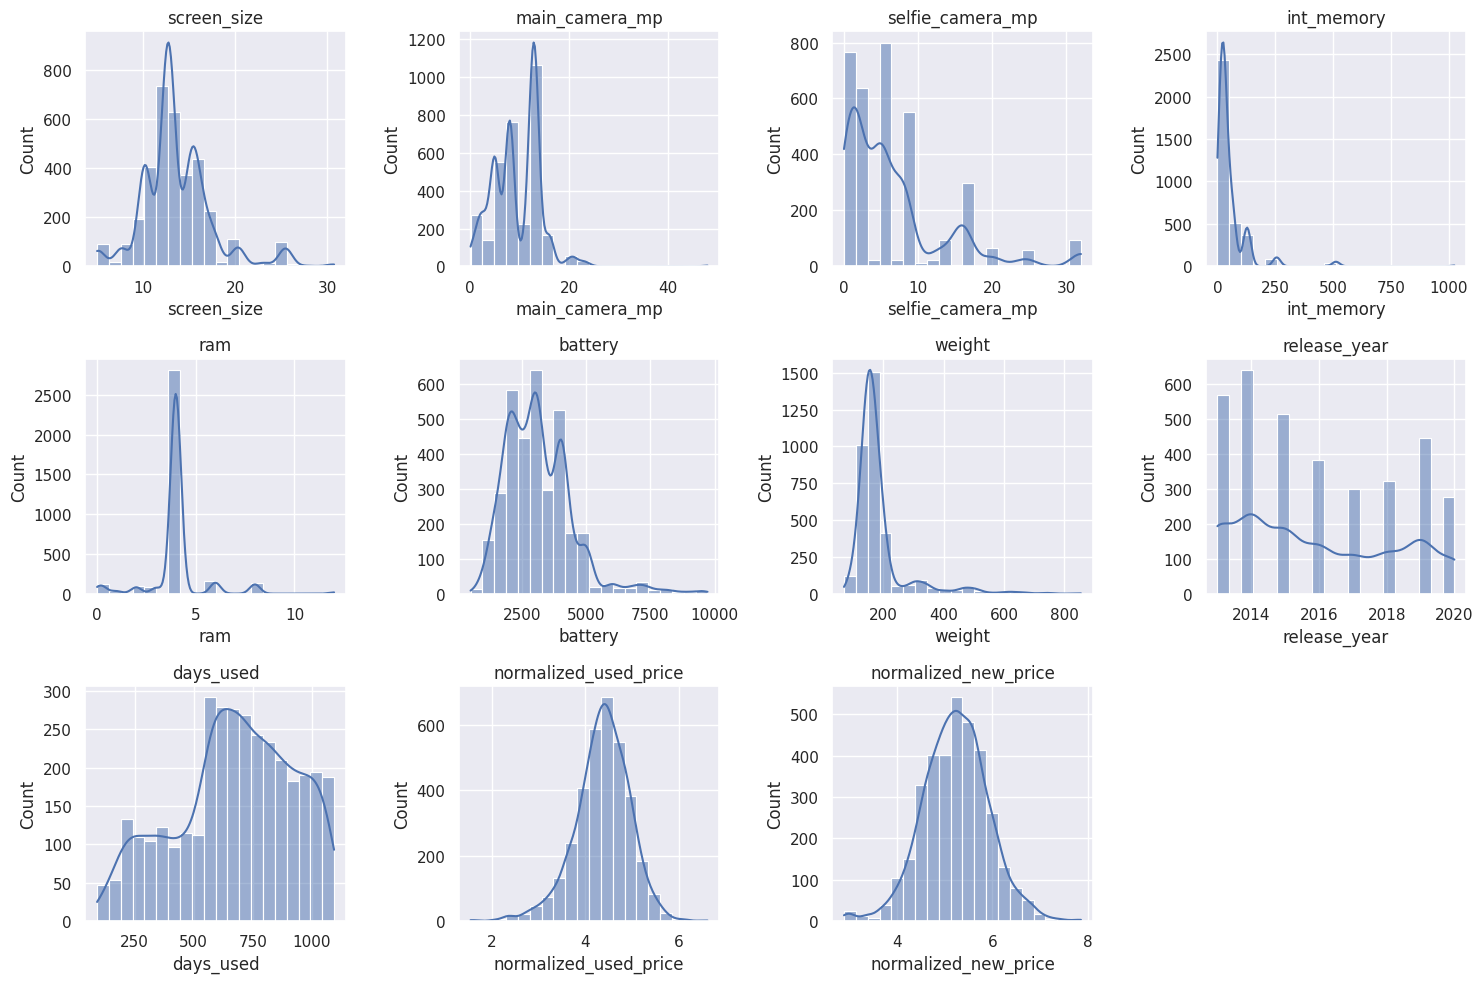

In [10]:
# Plot histograms for the numerical columns.
numerical_columns = df_copy.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df_copy[column], bins=20, kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

The histograms provide a visual overview of the distribution of each numerical variable. Some variables, like int_memory and battery, show a skewed distribution, while others, like release_year and days_used, exhibit more complex patterns.

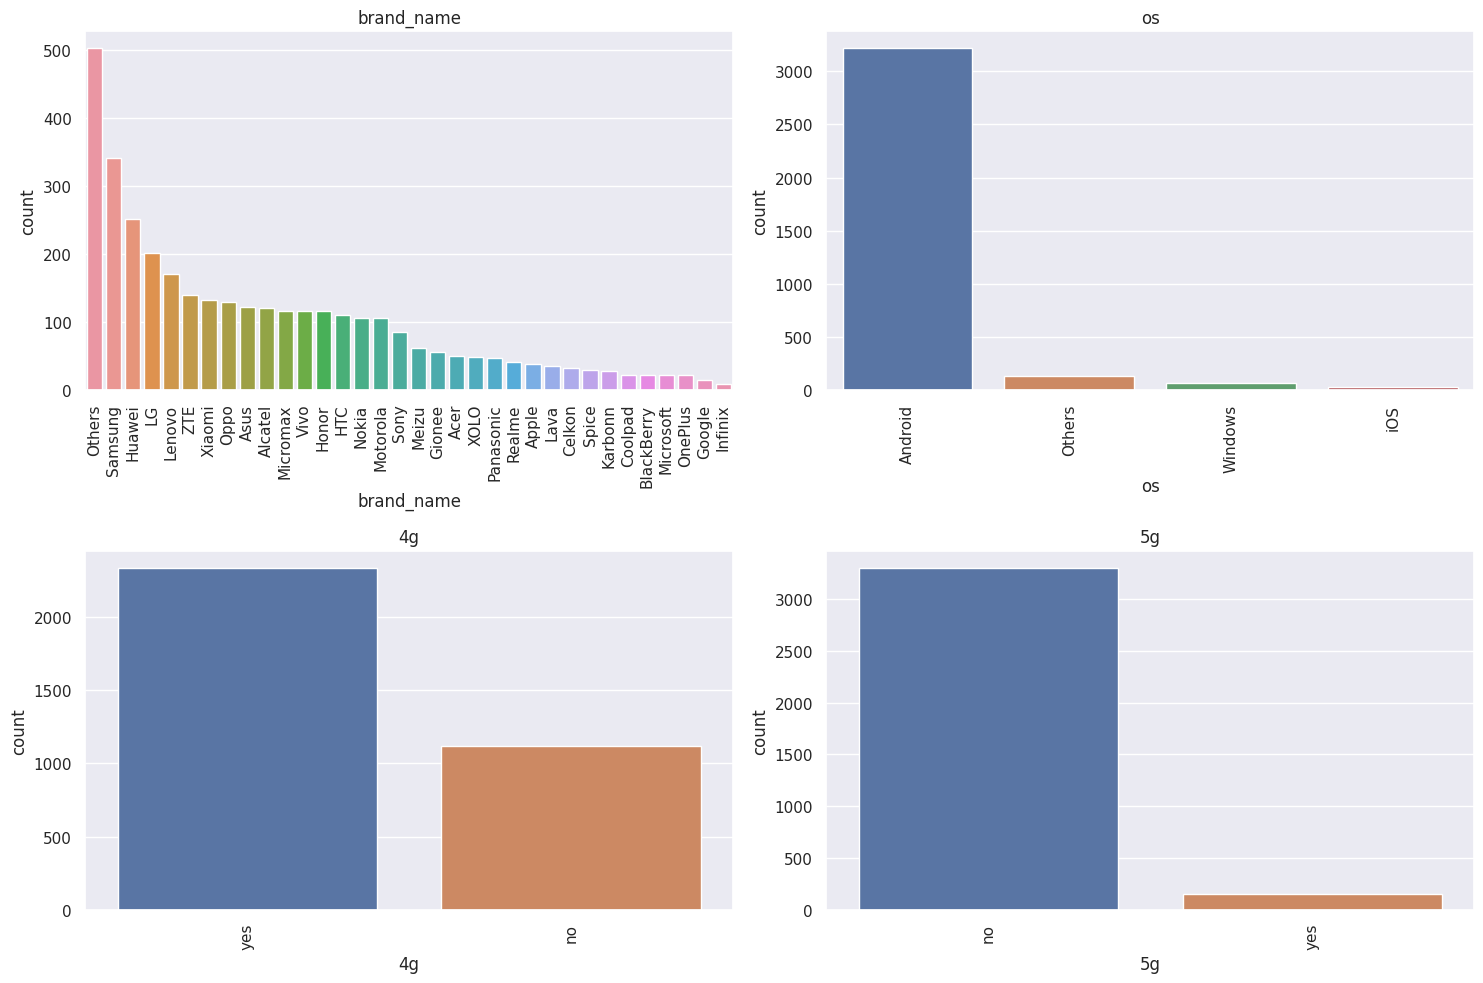

{'brand_name': Others        502
 Samsung       341
 Huawei        251
 LG            201
 Lenovo        171
 ZTE           140
 Xiaomi        132
 Oppo          129
 Asus          122
 Alcatel       121
 Micromax      117
 Vivo          117
 Honor         116
 HTC           110
 Nokia         106
 Motorola      106
 Sony           86
 Meizu          62
 Gionee         56
 Acer           51
 XOLO           49
 Panasonic      47
 Realme         41
 Apple          39
 Lava           36
 Celkon         33
 Spice          30
 Karbonn        29
 Coolpad        22
 BlackBerry     22
 Microsoft      22
 OnePlus        22
 Google         15
 Infinix        10
 Name: brand_name, dtype: int64,
 'os': Android    3214
 Others      137
 Windows      67
 iOS          36
 Name: os, dtype: int64,
 '4g': yes    2335
 no     1119
 Name: 4g, dtype: int64,
 '5g': no     3302
 yes     152
 Name: 5g, dtype: int64}

In [11]:
# Plotting bar plots for categorical columns
categorical_columns = df_copy.select_dtypes(include=['object'])
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns.columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df_copy, x=column, order=df_copy[column].value_counts().index)
    plt.title(column)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Returning frequency counts for categorical columns
categorical_summary = {column: df_copy[column].value_counts() for column in categorical_columns.columns}
categorical_summary

Here's the summary of the categorical variables in the dataset:

- brand_name: There are 34 different brands, with "Others" being the most common, followed by "Samsung," "Huawei," and others. Some brands like "Infinix," "Google," and "OnePlus" have fewer occurrences.
- os: The majority of devices run on "Android" (3214), followed by "Others" (137), "Windows" (67), and "iOS" (36).
- 4g: Most devices support 4G (2335), while 1119 devices do not.
- 5g: A significant majority of devices do not support 5G (3302), with only 152 devices that do.

###1. Distribution of normalized used device prices

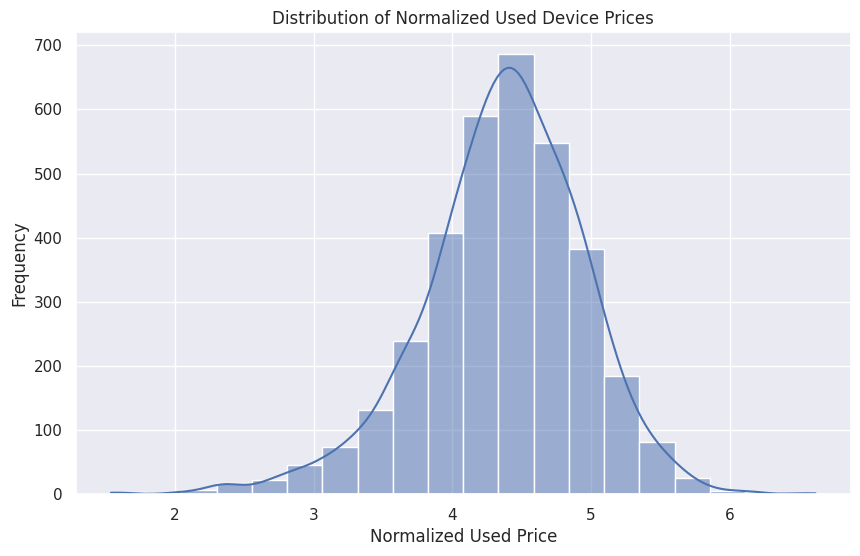

In [12]:
# Plotting the distribution of normalized used device prices
plt.figure(figsize=(10, 6))
sns.histplot(df_copy['normalized_used_price'], bins=20, kde=True)
plt.title('Distribution of Normalized Used Device Prices')
plt.xlabel('Normalized Used Price')
plt.ylabel('Frequency')
plt.show()

The distribution of normalized used device prices appears to be somewhat right-skewed. The majority of the devices fall within a lower price range, with fewer devices priced higher.

### 2. Android device percentage

In [13]:
# Calculating the percentage of devices running the Android operating system
android_percentage = (df_copy['os'] == 'Android').sum() / len(df_copy) * 100
android_percentage

93.05153445280834

### 3. Amount of RAM for different brands

<ipython-input-14-2b3d896fbed3>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='brand_name', y='ram', data=df_copy, ci=None, order=df_copy.groupby('brand_name')['ram'].mean().sort_values(ascending=False).index)


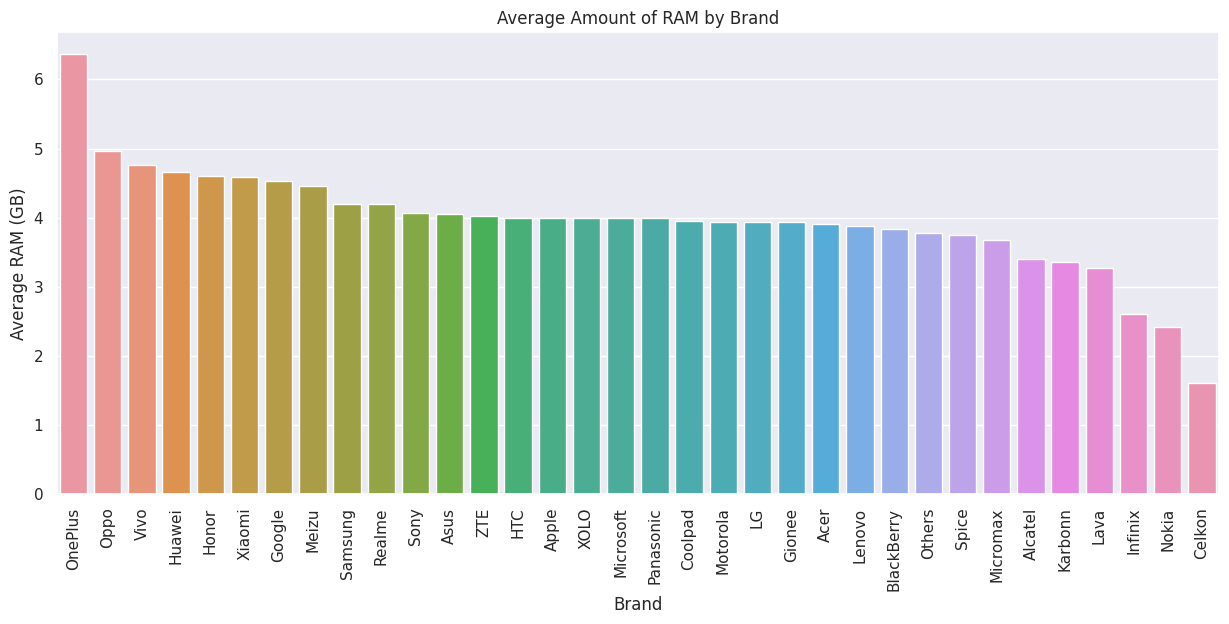

In [14]:
# Plotting the average amount of RAM for different brands
plt.figure(figsize=(15, 6))
sns.barplot(x='brand_name', y='ram', data=df_copy, ci=None, order=df_copy.groupby('brand_name')['ram'].mean().sort_values(ascending=False).index)
plt.title('Average Amount of RAM by Brand')
plt.xlabel('Brand')
plt.ylabel('Average RAM (GB)')
plt.xticks(rotation=90)
plt.show()

The bar plot shows the average amount of RAM for different brands. Some brands offer devices with higher average RAM, while others have lower averages. The differences in RAM might be related to the types of devices offered by each brand, such as high-end models versus budget-friendly options.

### 4. Devices with large batteries

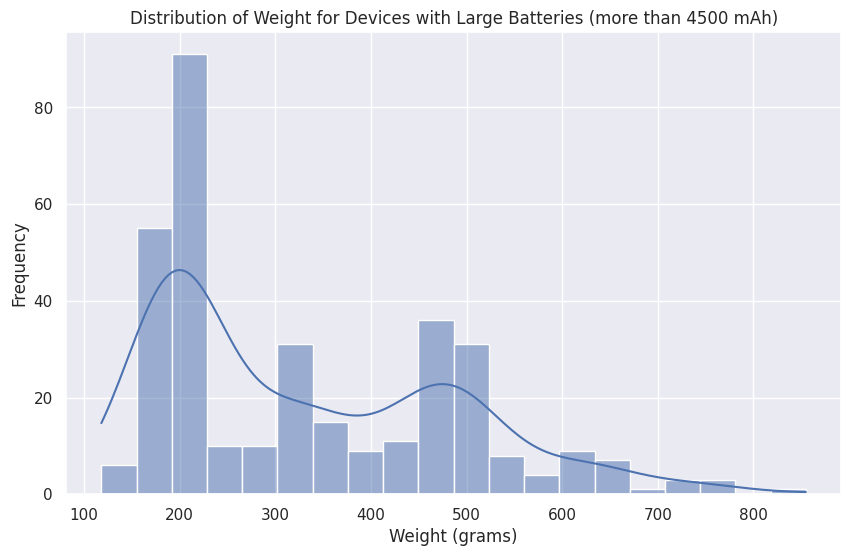

In [15]:
# Selecting devices with large batteries (more than 4500 mAh)
large_battery_data = df_copy[df_copy['battery'] > 4500]

# Plotting the distribution of weight for devices with large batteries
plt.figure(figsize=(10, 6))
sns.histplot(large_battery_data['weight'], bins=20, kde=True)
plt.title('Distribution of Weight for Devices with Large Batteries (more than 4500 mAh)')
plt.xlabel('Weight (grams)')
plt.ylabel('Frequency')
plt.show()

The distribution of weight for devices with large batteries (more than 4500 mAh) shows a wide range of values. While most devices fall within a certain weight range, there are also some heavier devices. The weight variation may be influenced by factors such as brand, design, and other hardware components.

### 5. Devices with larger screen size

In [16]:
# Selecting devices with screen size larger than 6 inches
large_screen_data = df_copy[df_copy['screen_size'] > 6]

# Counting the number of devices with large screens across different brands
large_screen_counts = large_screen_data['brand_name'].value_counts()
large_screen_counts

Others        479
Samsung       334
Huawei        251
LG            197
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Vivo          117
Honor         116
Alcatel       115
HTC           110
Micromax      108
Motorola      106
Sony           86
Nokia          72
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Spice          30
Karbonn        29
Celkon         25
Coolpad        22
OnePlus        22
Microsoft      22
BlackBerry     21
Google         15
Infinix        10
Name: brand_name, dtype: int64

### 6. Devices with greater than 8MP selfie cameras

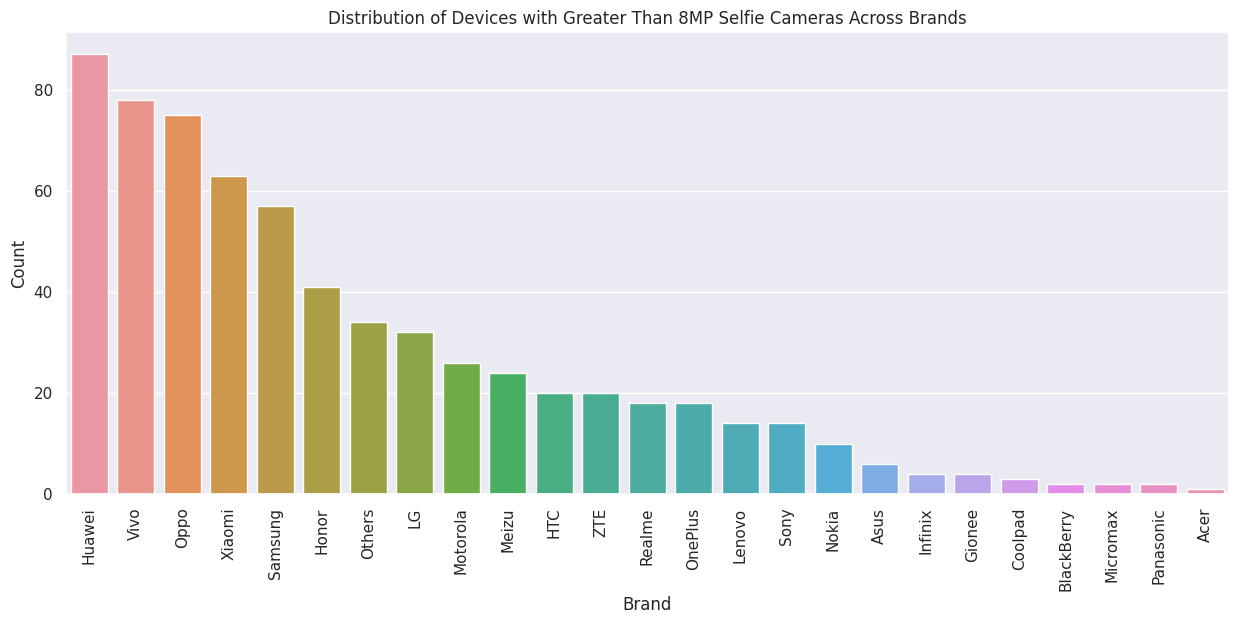

In [17]:
# Selecting devices with greater than 8MP selfie cameras
high_mp_selfie_data = df_copy[df_copy['selfie_camera_mp'] > 8]

# Plotting the distribution of devices with high MP selfie cameras across brands
plt.figure(figsize=(15, 6))
sns.countplot(data=high_mp_selfie_data, x='brand_name', order=high_mp_selfie_data['brand_name'].value_counts().index)
plt.title('Distribution of Devices with Greater Than 8MP Selfie Cameras Across Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

The bar plot shows the distribution of devices with greater than 8MP selfie cameras across different brands. Some brands offer a higher number of devices with high-resolution selfie cameras, while others offer fewer. This could be related to the target market and product positioning of each brand.

### 7. Attributes highly correlated with the normalized price

<ipython-input-18-1340aec62966>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_copy.corr()


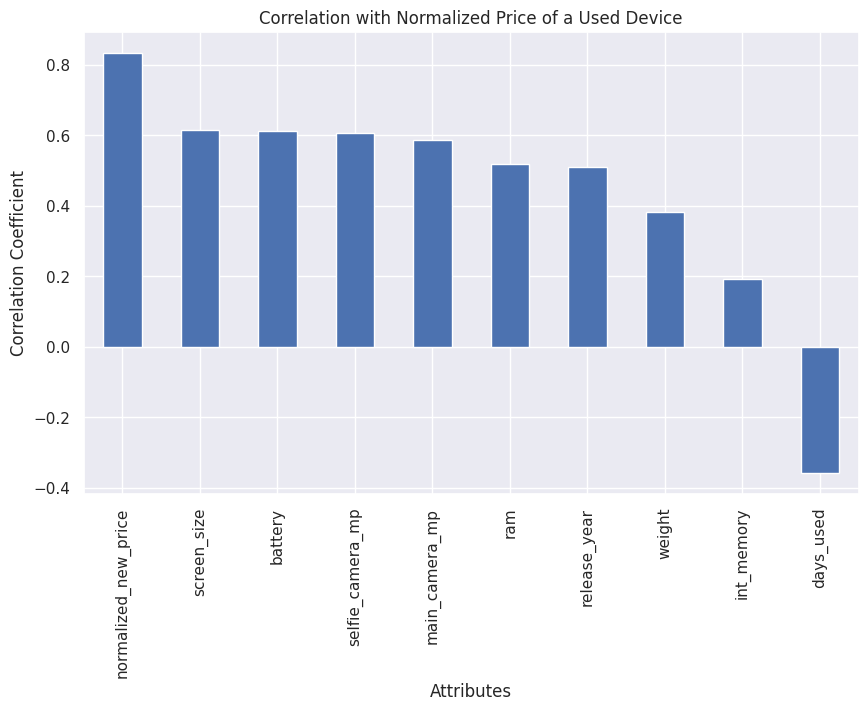

normalized_used_price    1.000000
normalized_new_price     0.834496
screen_size              0.614785
battery                  0.613619
selfie_camera_mp         0.608074
main_camera_mp           0.587302
ram                      0.520289
release_year             0.509790
weight                   0.382354
int_memory               0.190993
days_used               -0.358264
Name: normalized_used_price, dtype: float64

In [18]:
# Calculating the correlation matrix
correlation_matrix = df_copy.corr()

# Selecting the correlations with normalized_used_price
price_correlations = correlation_matrix['normalized_used_price'].sort_values(ascending=False)

# Plotting the correlations with normalized_used_price
plt.figure(figsize=(10, 6))
price_correlations.drop('normalized_used_price').plot(kind='bar')
plt.title('Correlation with Normalized Price of a Used Device')
plt.xlabel('Attributes')
plt.ylabel('Correlation Coefficient')
plt.show()

# Returning the correlations
price_correlations

The positive correlations indicate that attributes like new price, screen size, battery capacity, camera megapixels, RAM, release year, and weight are associated with higher used prices. On the other hand, the negative correlation with days_used suggests that devices that have been used for longer periods tend to have lower normalized prices.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

###1. Missing value treatment
Impute the missing values by the column medians grouped by release_year and brand_name.

In [19]:
# Columns with missing values
missing_values = df_copy.isnull().sum()
columns_with_missing_values = missing_values.index[missing_values > 0]

# Imputing missing values by grouping by 'brand_name' and 'release_year' and using the median of the respective group
for column in columns_with_missing_values:
    # Using transform to impute the median based on the groups
    df_copy[column] = df_copy.groupby(['brand_name', 'release_year'])[column].transform(lambda x: x.fillna(x.median()))

    # If any missing values remain (e.g., if an entire group is missing), filling with the overall median
    df_copy[column].fillna(df_copy[column].median(), inplace=True)

# Verifying if there are still any missing values
missing_values_after_grouped_imputation = df_copy.isnull().sum()
missing_values_after_grouped_imputation

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

### 2. Feature Engineering
Create a binary feature to represent whether a device has a large screen (greater than 6 inches) and whether it has a large battery (greater than 4500 mAh). These features might capture aspects that are important to customers.

In [20]:
# Creating a binary feature for large screen (greater than 6 inches)
df_copy['large_screen'] = (df_copy['screen_size'] > 6).astype(int)

# Creating a binary feature for large battery (greater than 4500 mAh)
df_copy['large_battery'] = (df_copy['battery'] > 4500).astype(int)

# Displaying the first few rows to verify the new features
df_copy[['large_screen', 'large_battery']].head()

,large_screen,large_battery
0,1,0
1,1,0
2,1,0
3,1,1
4,1,1


### 3. Outlier detection and treatment

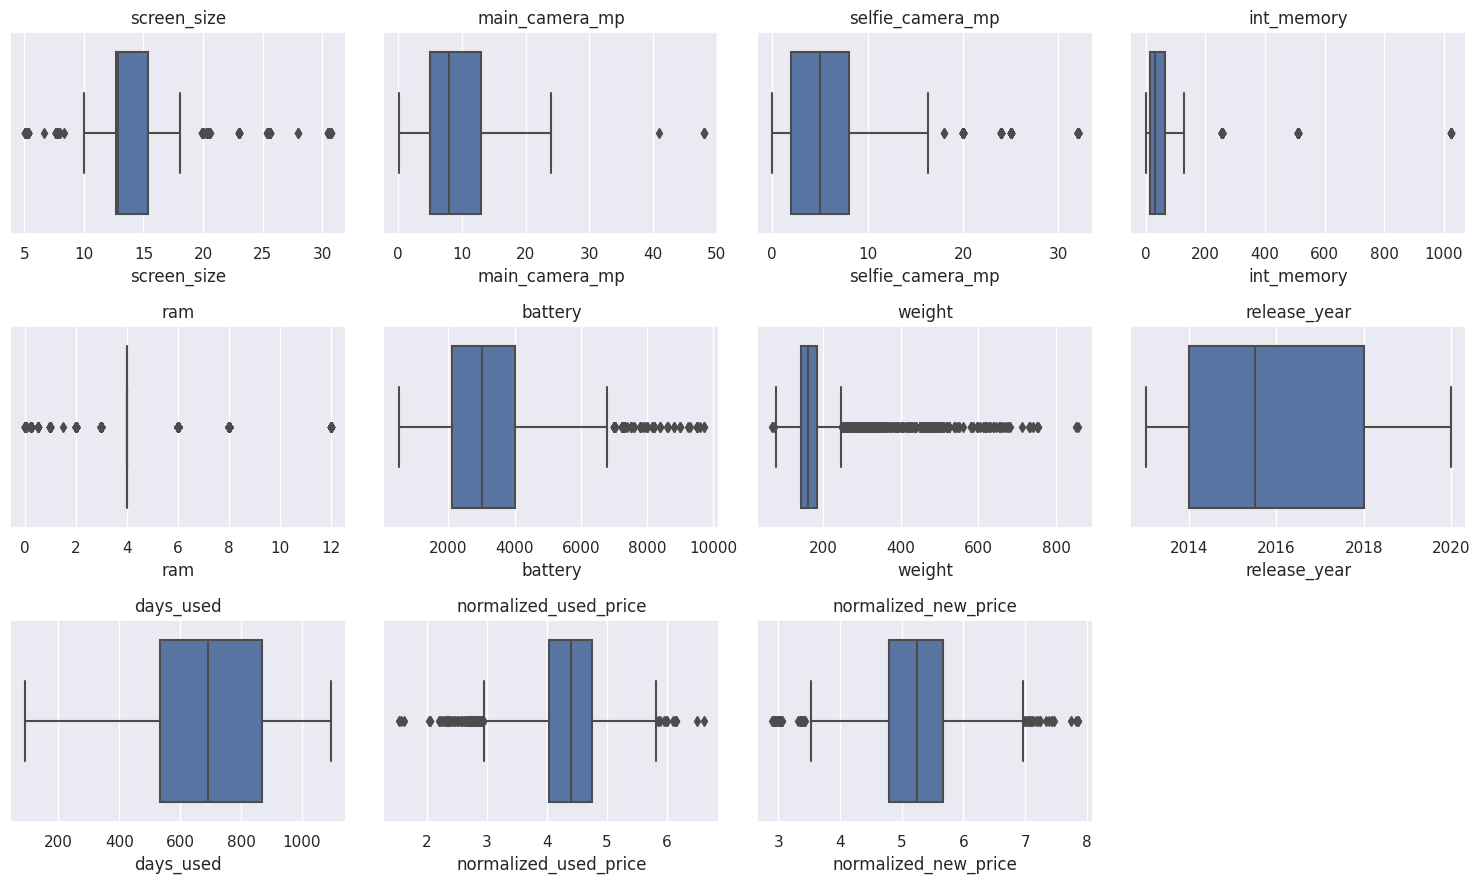

In [21]:
# Determining the number of rows and columns for subplots
num_numerical_columns = len(numerical_columns.columns)
num_rows = num_numerical_columns // 4 + (1 if num_numerical_columns % 4 > 0 else 0)

# Plotting box plots for numerical columns to identify outliers
plt.figure(figsize=(15, num_rows * 3))
for i, column in enumerate(numerical_columns.columns, 1):
    plt.subplot(num_rows, 4, i)
    sns.boxplot(x=df_copy[column])
    plt.title(column)
plt.tight_layout()
plt.show()

The box plots show potential outliers in several numerical columns. For features like main_camera_mp, selfie_camera_mp, int_memory, ram, battery, and weight, cap the outliers at a specific percentile since extreme values in these columns might be due to high-end specifications. For the target variable normalized_used_price, we should be cautious about altering it, as it could affect the modeling accuracy.

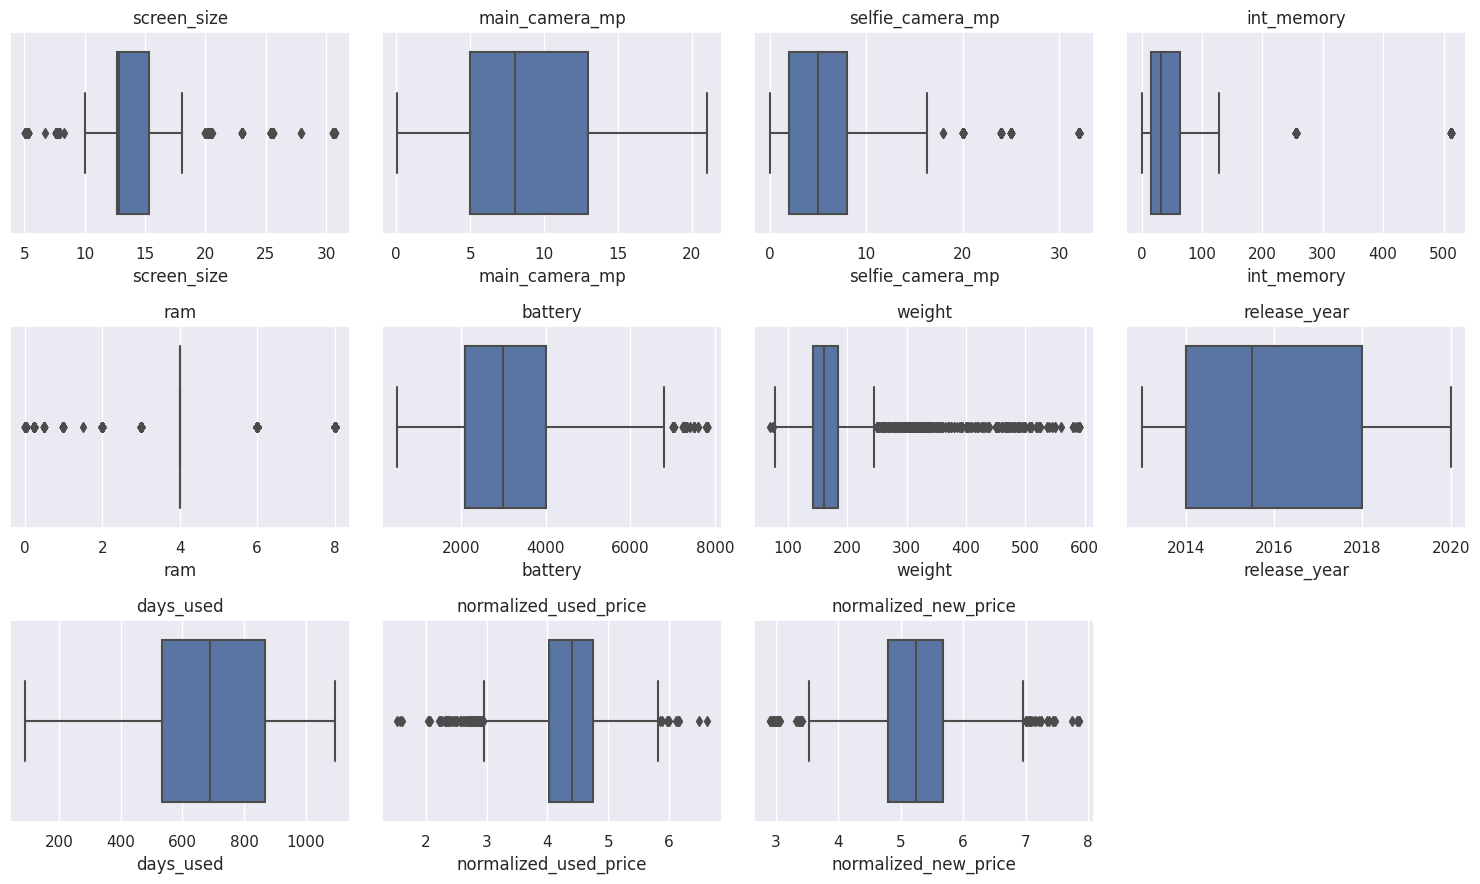

In [22]:
# Columns to cap outliers
columns_to_cap = ['main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight']

# Capping outliers at the 99th percentile for specified columns
for column in columns_to_cap:
    upper_bound = df_copy[column].quantile(0.99)
    df_copy[column] = df_copy[column].clip(upper=df_copy[column].quantile(0.99))

# Verifying the treatment by plotting box plots again
plt.figure(figsize=(15, num_rows * 3))
for i, column in enumerate(numerical_columns.columns, 1):
    plt.subplot(num_rows, 4, i)
    sns.boxplot(x=df_copy[column])
    plt.title(column)
plt.tight_layout()
plt.show()

The box plots show that the outliers have been capped for the specified columns, reducing their impact on the modeling process.

### 4. Preparing data for modeling

In [23]:
# Define the dependent and independent variables.
X = df_copy.drop(columns=['normalized_used_price'])  # Independent variables
y = df_copy['normalized_used_price']  # Dependent variable

# Add the intercept to the data
X = sm.add_constant(X)

# Create dummy variables
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)

In [24]:
# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Displaying the shape of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2417, 51), (1037, 51), (2417,), (1037,))

## EDA

- It is a good idea to explore the data once again after manipulating it.

### 1. Summary Statistics for Training Data

In [25]:
# Summary statistics for numerical variables in the training data
summary_statistics_train = X_train.describe().T
summary_statistics_train.head(10)

,count,mean,std,min,25%,50%,75%,max
const,2417.0,1.000000,0.000000,1.00,1.0,1.00,1.00,1.00
screen_size,2417.0,13.710554,3.838778,5.08,12.7,12.83,15.34,30.71
main_camera_mp,2417.0,9.361121,4.485931,0.08,5.0,8.00,13.00,21.00
selfie_camera_mp,2417.0,6.524803,6.824626,0.00,2.0,5.00,8.00,32.00
int_memory,2417.0,53.179727,73.731826,0.06,16.0,32.00,64.00,512.00
ram,2417.0,4.011771,1.257925,0.02,4.0,4.00,4.00,8.00
battery,2417.0,3122.124592,1260.204968,500.00,2100.0,3000.00,4000.00,7805.64
weight,2417.0,181.832044,84.507989,69.00,142.0,160.00,185.00,589.70
release_year,2417.0,2015.986347,2.283557,2013.00,2014.0,2016.00,2018.00,2020.00
days_used,2417.0,676.218039,247.343223,91.00,535.0,691.00,867.00,1094.00


### 2. Correlation Matrix for Training Data

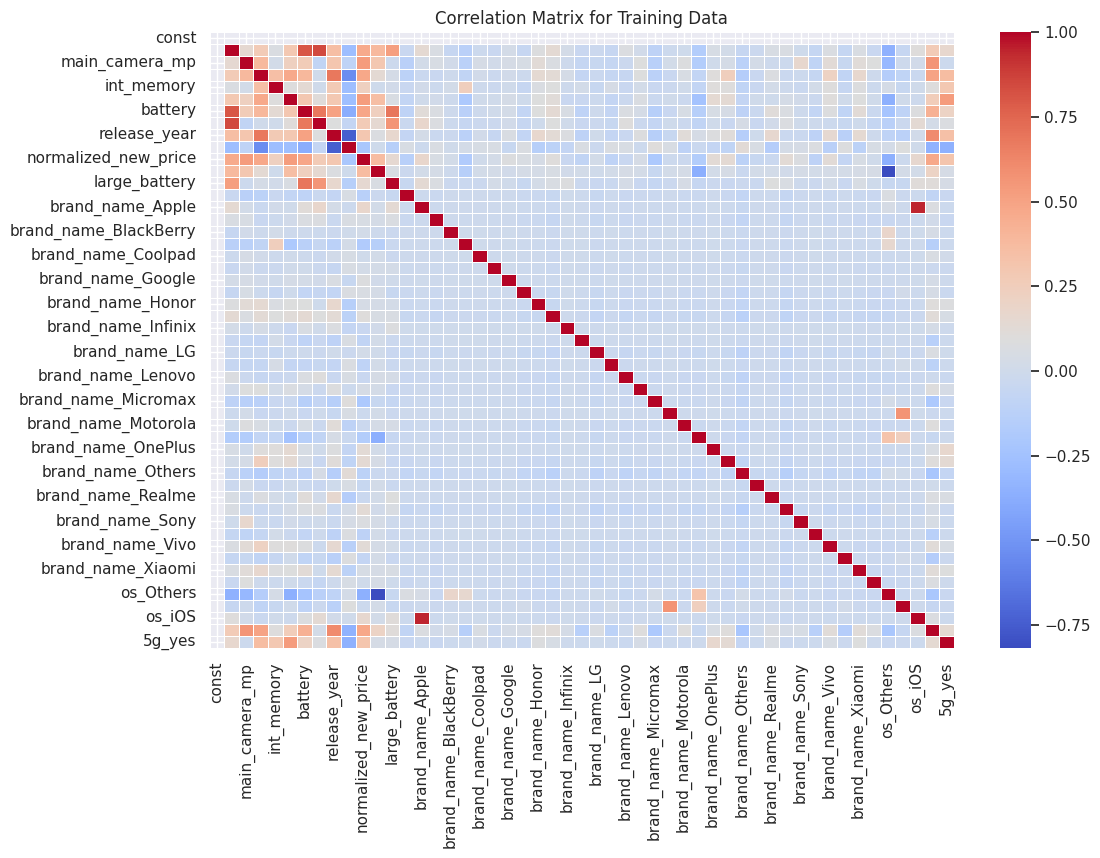

In [26]:
# Calculating correlation matrix for numerical variables in the training data
correlation_matrix_train = X_train.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_train, annot=False, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Matrix for Training Data")
plt.show()

### 3. Distribution of Target Variable in Training Data

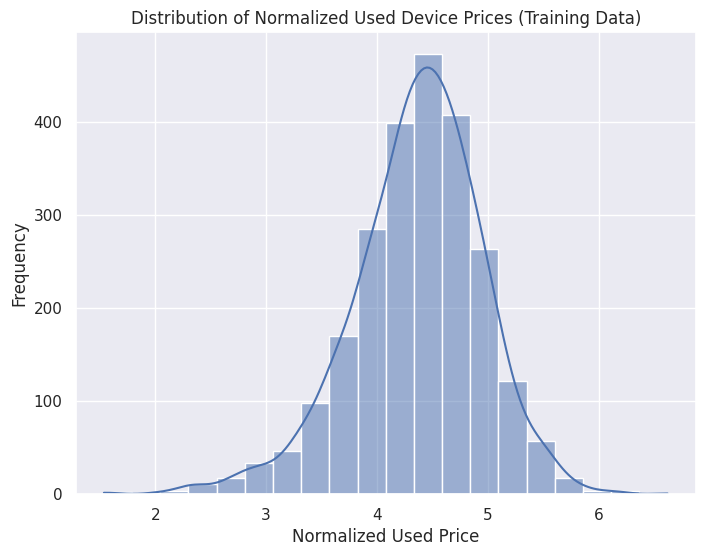

In [27]:
# Plotting the distribution of the target variable (normalized_used_price) in the training data
plt.figure(figsize=(8, 6))
sns.histplot(y_train, bins=20, kde=True)
plt.title('Distribution of Normalized Used Device Prices (Training Data)')
plt.xlabel('Normalized Used Price')
plt.ylabel('Frequency')
plt.show()

## Model Building - Linear Regression

In [28]:
olsmodel1 = sm.OLS(y_train, X_train).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.849
Model:                               OLS   Adj. R-squared:                  0.846
Method:                    Least Squares   F-statistic:                     266.5
Date:                   Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                           01:47:50   Log-Likelihood:                 127.67
No. Observations:                   2417   AIC:                            -153.3
Df Residuals:                       2366   BIC:                             142.0
Df Model:                             50                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


## Model Performance Check

In [29]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [30]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel1, X_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229521,0.177905,0.849202,0.84595,4.277245


In [31]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel1, X_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.236274,0.18663,0.836066,0.827579,4.467716


The model shows strong performance on both the training and test data, with high R-squared values and relatively low error metrics. The close agreement between the training and test metrics indicates good generalization, meaning that the model is not overfitting the training data. The slight increase in error metrics from training to test data is expected and indicates that the model may have captured some noise or specific patterns in the training data that do not generalize perfectly to the test data. However, the differences are minor, suggesting a robust model.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

### 1. No Multicollinearity

In [32]:
#define a function to check VIF.
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [43]:
# Apply VIF function on training data
checking_vif(X_train)

,feature,VIF
0,const,3.853499e+06
1,screen_size,9.190514e+00
2,main_camera_mp,2.443709e+00
3,selfie_camera_mp,2.973049e+00
4,int_memory,1.504404e+00
5,ram,2.351515e+00
6,battery,6.513705e+00
7,weight,7.101390e+00
8,release_year,4.926933e+00
9,days_used,2.599577e+00


#### a. Remove Multicollinearity

In [34]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [45]:
# Features with high VIF (>5), excluding constant and dummy variables.
col_list = ['screen_size', 'battery', 'weight']
res = treating_multicollinearity(X_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,battery,0.845971,0.232015
1,weight,0.843547,0.233833
2,screen_size,0.842539,0.234585


In [47]:
# Drop the variable that makes the least change in adjusted R-squared.
col_to_drop = 'battery'
X_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Recheck VIF
vif = checking_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  battery


,feature,VIF
0,const,3.733777e+06
1,screen_size,8.542009e+00
2,main_camera_mp,2.398688e+00
3,selfie_camera_mp,2.956017e+00
4,int_memory,1.502986e+00
5,ram,2.349292e+00
6,weight,6.876575e+00
7,release_year,4.773006e+00
8,days_used,2.599303e+00
9,normalized_new_price,3.294853e+00


In [51]:
# Drop the next variable that makes the least change in adjusted R-squared.
col_to_drop = 'weight'
X_train3 = X_train2.loc[:, ~X_train2.columns.str.startswith(col_to_drop)]
X_test3 = X_test2.loc[:, ~X_test2.columns.str.startswith(col_to_drop)]

# Recheck VIF
vif = checking_vif(X_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight


,feature,VIF
0,const,3.667263e+06
1,screen_size,2.288773e+00
2,main_camera_mp,2.328841e+00
3,selfie_camera_mp,2.923289e+00
4,int_memory,1.501939e+00
5,ram,2.347292e+00
6,release_year,4.686907e+00
7,days_used,2.578319e+00
8,normalized_new_price,3.288226e+00
9,large_screen,3.749561e+00


In [52]:
# Rebuild the model using the updated set of predictors variables.
olsmodel2 = sm.OLS(y_train, X_train3).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.847
Model:                               OLS   Adj. R-squared:                  0.844
Method:                    Least Squares   F-statistic:                     272.5
Date:                   Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                           03:11:10   Log-Likelihood:                 107.93
No. Observations:                   2417   AIC:                            -117.9
Df Residuals:                       2368   BIC:                             165.9
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


 The adj. R-squared dropped from 0.846 to 0.844, which shows that the dropped columns did not have much effect on the model.

In [53]:
# Deal with high p value variables
predictors = X_train3.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'release_year', 'normalized_new_price', 'brand_name_Celkon']


In [54]:
X_train4 = X_train3[selected_features]
X_test4 = X_test3[selected_features]

In [55]:
olsmodel3 = sm.OLS(y_train, X_train4).fit()
print(olsmodel3.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     1843.
Date:                   Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                           03:20:11   Log-Likelihood:                 76.025
No. Observations:                   2417   AIC:                            -136.0
Df Residuals:                       2409   BIC:                            -89.73
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [56]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel3_train_perf = model_performance_regression(olsmodel3, X_train4, y_train)
olsmodel3_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234478,0.181398,0.842617,0.842095,4.361155


In [58]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel3_test_perf = model_performance_regression(olsmodel3, X_test4, y_test)
olsmodel3_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.240029,0.189843,0.830815,0.829498,4.538559


No feature has p-value greater than 0.05, therefore, consider the features in X_train4 as the final set of predictor variables and olsmodel3 as the final model to move forward with.

#### b. Linearity and independence

In [60]:
# Create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel3.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel3.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
1744,4.261975,4.297792,-0.035817
3141,4.175156,3.841704,0.333453
1233,4.117410,4.468183,-0.350773
3046,3.782597,3.848152,-0.065555
2649,3.981922,3.905686,0.076236


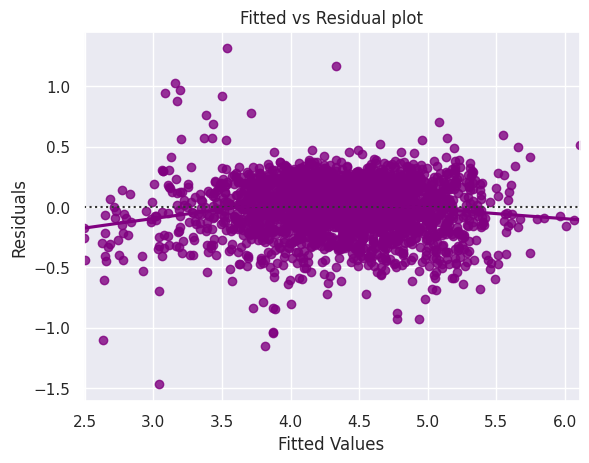

In [61]:
# Plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

No pattern in the plot above, therefore, the assumptions of linearity and independence are satisfied.

#### c. Normality of error terms

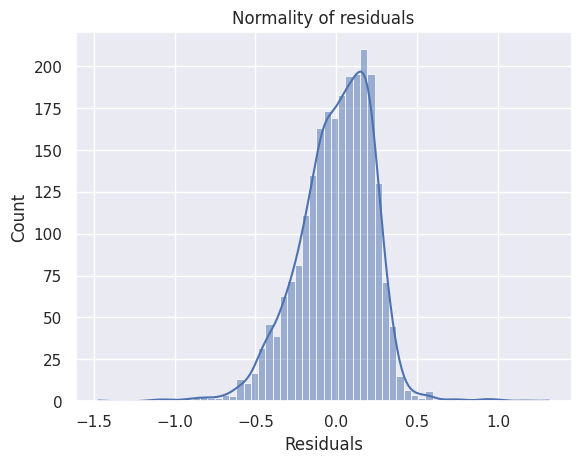

In [62]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

The histogram of residuals shows a bell shape.

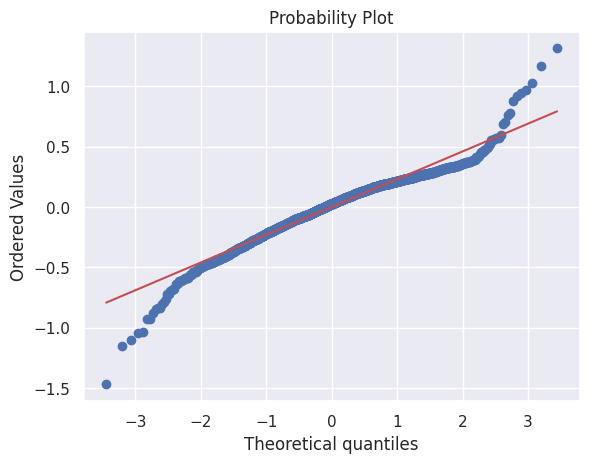

In [63]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

The residuals more or less follow a straight line.

In [64]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9636186361312866, pvalue=3.2991579061667585e-24)

Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test. However, based on the distribution plot and Q-Q plot, we can consider the distribution to be a good approximation of the normal distribution. So, the assumption is satisfied.

#### d. Test for Homoscedasticity

In [65]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train4)
lzip(name, test)

[('F statistic', 0.9313349630850524), ('p-value', 0.8910203207627568)]

Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.

## Final Model

In [66]:
olsmodel_final = sm.OLS(y_train, X_train4).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     1843.
Date:                   Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                           04:14:01   Log-Likelihood:                 76.025
No. Observations:                   2417   AIC:                            -136.0
Df Residuals:                       2409   BIC:                            -89.73
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [67]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, X_train4, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234478,0.181398,0.842617,0.842095,4.361155


In [68]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, X_test4, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.240029,0.189843,0.830815,0.829498,4.538559


## Actionable Insights and Recommendations

#### Model Performance Summary
- R-squared: The R-squared value of 0.843 indicates that approximately 84.3% of the variability in the normalized used price can be explained by the selected features. This suggests a good fit.
- Adjusted R-squared: The adjusted R-squared value accounts for the number of predictors in the model and is also high (0.842), supporting the model's effectiveness.

#### Key Features
- Screen Size: A significant positive coefficient (0.0434) shows that an increase in screen size leads to an increase in the used device price.
- Main Camera MP: The positive coefficient (0.0232) suggests that higher main camera megapixels increase the price.
- Selfie Camera MP: A positive effect on price with a coefficient of 0.0117.
- RAM: More RAM is associated with a higher price, with a coefficient of 0.0230.
- Release Year: The positive coefficient (0.0232) indicates that more recent devices are priced higher.
- Normalized New Price: This has a substantial positive impact on the used price, with a coefficient of 0.4177.
- Brand Name (Celkon): This brand has a negative coefficient (-0.1614), indicating that it is associated with a lower used price compared to other brands.

#### Performance Metrics
- Training Data: RMSE: 0.234478, MAE: 0.181398, Adjusted R-squared: 0.842095, MAPE: 4.361155
- Test Data: RMSE: 0.240029, MAE: 0.189843, Adjusted R-squared: 0.829498, MAPE: 4.538559

#### Conclusions
- Effective Model: The model effectively explains the variability in used device prices and performs well on both training and testing data.
- Influential Features: Key features like screen size, camera quality, RAM, release year, and brand play significant roles in determining used device prices.
- Consistency: The model's consistency across training and test datasets indicates robustness.

#### Actionable Insights
- Focus on Key Features: Retailers and resellers can focus on devices with larger screens, higher camera quality, more RAM, and recent release years to command higher prices.
- Dynamic Pricing Strategy: The model can be deployed to dynamically adjust pricing based on the features that significantly impact price.
- Brand Positioning: Consider positioning and marketing strategies for specific brands, such as Celkon, based on their impact on pricing.
- New vs. Used Price Relationship: Leverage the strong relationship between new and used prices to align pricing strategies across product lines.
